<a href="https://colab.research.google.com/github/renanalencar/projeto-md-emocoes/blob/main/Assign10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.frequent_patterns import association_rules
import itertools
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Tratando os dados

In [ ]:
arquivo_tedio = "/content/drive/Shareddrives/MINERAÇÃO DE DADOS ENG74291/Database/cluster01_tedio_estresse/dadosTedioB_cluster1.xlsx"
df_tedio = pd.read_excel(arquivo_tedio)

# deixar no dataframe somente com as linhas correspondentes ao game_id 1
df_tedio = df_tedio.drop(columns=['timestamp', 'game_name', 'uuid', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23','p24'])

filtro  = df_tedio["game_id"] == 1
df_tedio = df_tedio[filtro]
df_tedio = df_tedio.drop(columns=['game_id'])

# visualizar as 8 primeiras entradas do df
df_tedio.head(8)

,angry,disgusted,fear,sad,surprised,happy
0,0.034800,0.057187,0.010910,0.125495,0.191988,0.131196
1,0.040922,0.065980,0.009346,0.123534,0.117035,0.136284
2,0.029513,0.050042,0.009480,0.120868,0.194130,0.185262
3,0.037817,0.071314,0.010974,0.166960,0.150470,0.122635
4,0.040636,0.067900,0.010229,0.137022,0.154919,0.132826
5,0.024871,0.045830,0.008720,0.153731,0.235671,0.183499
6,0.042983,0.077609,0.011438,0.175638,0.128352,0.108902
7,0.037752,0.062227,0.010248,0.155643,0.159876,0.125097


## Ajustando valores contínuos


In [ ]:
matrix = df_tedio.to_numpy()

matrix

array([[0.03479982, 0.05718747, 0.01091015, 0.12549546, 0.19198831,
        0.13119609],
       [0.04092193, 0.06597964, 0.00934601, 0.1235335 , 0.11703547,
        0.1362838 ],
       [0.02951298, 0.05004201, 0.00948046, 0.12086825, 0.19413033,
        0.18526204],
       ...,
       [0.43974007, 0.6773404 , 0.03127823, 0.08544805, 0.00248411,
        0.00528486],
       [0.22045008, 0.46955588, 0.02042898, 0.09037666, 0.00441339,
        0.01749024],
       [0.49184734, 0.68961991, 0.02856505, 0.08411918, 0.00161628,
        0.00458242]])

In [ ]:
matrix.T

array([[0.03479982, 0.04092193, 0.02951298, ..., 0.43974007, 0.22045008,
        0.49184734],
       [0.05718747, 0.06597964, 0.05004201, ..., 0.6773404 , 0.46955588,
        0.68961991],
       [0.01091015, 0.00934601, 0.00948046, ..., 0.03127823, 0.02042898,
        0.02856505],
       [0.12549546, 0.1235335 , 0.12086825, ..., 0.08544805, 0.09037666,
        0.08411918],
       [0.19198831, 0.11703547, 0.19413033, ..., 0.00248411, 0.00441339,
        0.00161628],
       [0.13119609, 0.1362838 , 0.18526204, ..., 0.00528486, 0.01749024,
        0.00458242]])

In [ ]:
np_data = np.linalg.pinv(matrix.T)
data = pd.DataFrame(np_data, columns = ['angry', 'disgusted','fear','sad','surprised','happy'])
data

,angry,disgusted,fear,sad,surprised,happy
0,-0.000209,0.000341,-0.001301,0.000022,0.001023,-0.000107
1,-0.000139,0.000221,-0.000716,0.000101,0.000450,0.000080
2,-0.000091,0.000175,-0.001172,-0.000028,0.000916,0.000102
3,-0.000341,0.000437,-0.001105,0.000201,0.000695,-0.000101
4,-0.000222,0.000334,-0.001053,0.000098,0.000736,-0.000038
...,...,...,...,...,...,...
5427,-0.002450,0.003551,-0.000513,0.000073,0.000504,-0.000886
5428,-0.001750,0.002997,-0.000344,0.000030,0.000417,-0.000799
5429,-0.001974,0.003317,-0.000527,0.000022,0.000524,-0.000887
5430,-0.002627,0.003339,-0.000506,0.000150,0.000413,-0.000763


In [ ]:
data[data <= 0] = 0
data[data > 0] = 1


# Correlação

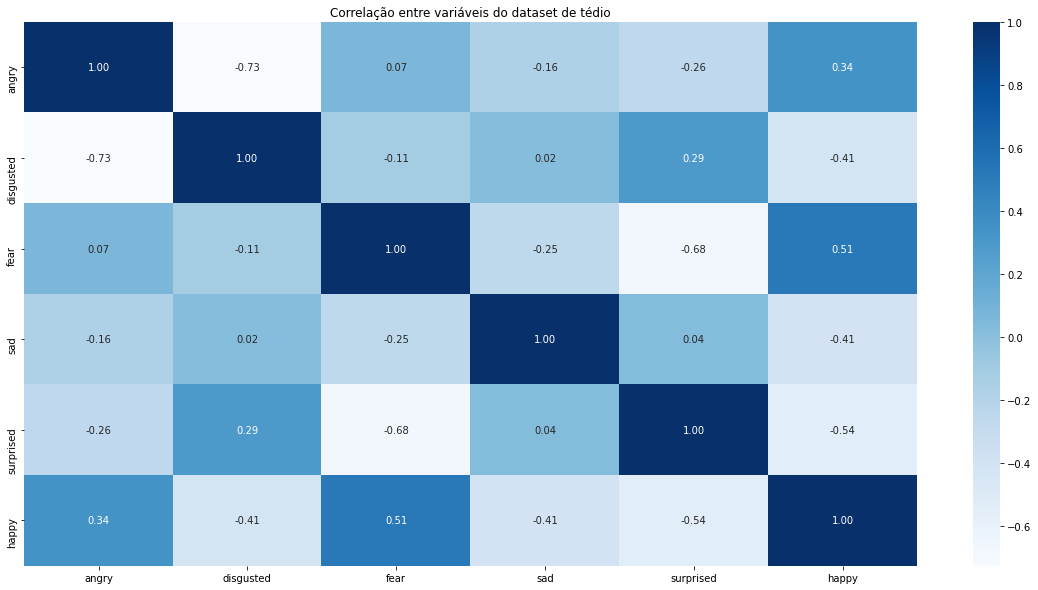

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de tédio')
plt.show()

In [ ]:
data.sum()

angry        3299.0
disgusted    2682.0
fear         2964.0
sad          2935.0
surprised    2416.0
happy        2700.0
dtype: float64

Text(0.5, 1.0, 'Importância de cada feature')

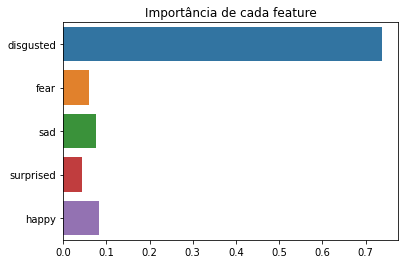

In [ ]:
# criar os conjuntos de dados e classes para treinamento e teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(data.drop(columns=['angry']), data.angry, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
clf_RFC  = RandomForestClassifier()
clf_RFC.fit(X_treinamento, y_treinamento)

# Mostrando importância de cada feature
clf_RFC.feature_importances_

importances = pd.Series(data=clf_RFC.feature_importances_, index=data.columns[1:6])
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

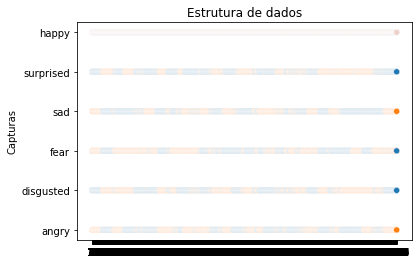

In [ ]:
p = data.copy()
for i in range(1, len(p.columns)+1):
    p["Cat"] = np.where(p[p.columns[i]] == 1, 1, 0)
    p[p.columns[i]]= i
    g =sns.scatterplot(p.index, p[p.columns[i]], hue = p.Cat, legend = False)
    g.yaxis.set_label_text('Capturas')
    g.set_yticks(np.arange(1, len(p.columns)))
    g.set_xticks(data.index)
    g.set_yticklabels(data.columns)
    plt.title("Estrutura de dados")

In [ ]:
!pip install apyori
from apyori import apriori as apyori

apyori(data)
# apriori(data, use_colnames=True)

<generator object apriori at 0x7efdee625c50>

# Apriori

Cálculo do Suporte com mínimo de 60%.

In [ ]:
apriori(data, min_support=0.6, use_colnames=True)

,support,itemsets
0,0.607327,(angry)


Selecionando e filtrando os resultados.

In [ ]:
frequent_itemsets = apriori(data, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.607327,(angry),1


In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.7) ]

,support,itemsets,length


In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'angry', 'disgusted'} ]

,support,itemsets,length


In [ ]:
te = TransactionEncoder()
oht_ary = te.fit(data).transform(data, sparse=True)
sparse_df = pd.DataFrame.sparse.from_spmatrix(oht_ary, columns=te.columns_)
sparse_df

,a,d,e,f,g,h,i,n,p,r,s,t,u,y
0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
1,0,1,1,0,1,0,1,0,0,0,1,1,1,0
2,1,0,1,1,0,0,0,0,0,1,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,1,0,0,0,1,0,1,1,1,0,1,0
5,1,0,0,0,0,1,0,0,1,0,0,0,0,1


In [ ]:
apriori(sparse_df, min_support=0.5, use_colnames=True)

,support,itemsets
0,0.666667,(a)
1,0.500000,(d)
2,0.500000,(e)
3,0.500000,(r)
4,0.500000,(s)
5,0.500000,"(s, d)"


Definindo um valor limite para o valor de suporte e calculando o valor de suporte. 

In [ ]:
df_new = apriori(data, min_support = 0.2, use_colnames = True)
df_new

,support,itemsets
0,0.607327,(angry)
1,0.493741,(disgusted)
2,0.545655,(fear)
3,0.540317,(sad)
4,0.444772,(surprised)
5,0.497054,(happy)
6,0.347938,"(angry, fear)"
7,0.288660,"(angry, sad)"
8,0.207658,"(angry, surprised)"
9,0.385677,"(happy, angry)"


Vendo os valores de interpretação usando a função da regra de associação.

In [ ]:
df_ar = association_rules(df_new, metric = "confidence", min_threshold = 0.6)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(fear),(angry),0.545655,0.607327,0.347938,0.637652,1.049932,0.016547,1.083690
1,(happy),(angry),0.497054,0.607327,0.385677,0.775926,1.277608,0.083803,1.752425
2,(angry),(happy),0.607327,0.497054,0.385677,0.635041,1.277608,0.083803,1.378087
3,(surprised),(disgusted),0.444772,0.493741,0.292526,0.657699,1.332073,0.072924,1.478987
4,(happy),(fear),0.497054,0.545655,0.399300,0.803333,1.472236,0.128080,2.310227
5,(fear),(happy),0.545655,0.497054,0.399300,0.731781,1.472236,0.128080,1.875133
6,"(angry, happy)",(fear),0.385677,0.545655,0.301546,0.781862,1.432885,0.091099,2.082827
7,"(happy, fear)",(angry),0.399300,0.607327,0.301546,0.755187,1.243460,0.059040,1.603970
8,"(angry, fear)",(happy),0.347938,0.497054,0.301546,0.866667,1.743605,0.128602,3.772091
9,(happy),"(angry, fear)",0.497054,0.347938,0.301546,0.606667,1.743605,0.128602,1.657784


In [ ]:
df_results = list(df_ar)
print(len(df_results))

9


In [ ]:
df_results

['antecedents',
 'consequents',
 'antecedent support',
 'consequent support',
 'support',
 'confidence',
 'lift',
 'leverage',
 'conviction']

# FP-Growth(Frequent Pattern Growth) utilizando pyfpgrowth




In [ ]:
!pip install pyfpgrowth

     |████████████████████████████████| 1.6MB 20.0MB/s 
  Created wheel for pyfpgrowth: filename=pyfpgrowth-1.0-py2.py3-none-any.whl size=5477 sha256=7a83a2059310f7e6c3a14507115b7d53b483c119a0df5cc002b7e16d66e2e371
  Stored in directory: /root/.cache/pip/wheels/3b/3f/0d/a04bb8b17887c1eca7d0f1a48d4aa0c09c96eb221ff7fa56c1
Successfully built pyfpgrowth


In [ ]:
import pyfpgrowth

Encontrar padrões frequentes em capturas que ocorrem acima do limite de suporte

In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(data, 2)

In [ ]:
patterns

{('a',): 4,
 ('a', 'p'): 2,
 ('a', 'p', 'y'): 2,
 ('a', 'r'): 2,
 ('a', 'y'): 2,
 ('d',): 4,
 ('d', 'e'): 3,
 ('d', 'e', 'i'): 3,
 ('d', 'e', 'i', 'r'): 2,
 ('d', 'e', 'i', 'r', 's'): 2,
 ('d', 'e', 'i', 's'): 3,
 ('d', 'e', 'r'): 2,
 ('d', 'e', 'r', 's'): 2,
 ('d', 'e', 'r', 's', 'u'): 2,
 ('d', 'e', 'r', 'u'): 2,
 ('d', 'e', 's'): 6,
 ('d', 'e', 's', 'u'): 3,
 ('d', 'e', 'u'): 3,
 ('d', 'g'): 2,
 ('d', 'g', 's'): 2,
 ('d', 'i'): 3,
 ('d', 'i', 'r'): 2,
 ('d', 'i', 'r', 's'): 2,
 ('d', 'i', 's'): 6,
 ('d', 'r'): 2,
 ('d', 'r', 's'): 2,
 ('d', 'r', 's', 'u'): 2,
 ('d', 'r', 'u'): 2,
 ('d', 's'): 7,
 ('d', 's', 'u'): 6,
 ('d', 'u'): 3,
 ('e', 'i'): 2,
 ('e', 'i', 'r'): 2,
 ('e', 'i', 'r', 's'): 2,
 ('e', 'i', 's'): 4,
 ('e', 'r'): 3,
 ('e', 'r', 's'): 4,
 ('e', 'r', 's', 'u'): 2,
 ('e', 'r', 'u'): 2,
 ('e', 's'): 4,
 ('e', 's', 's'): 2,
 ('e', 's', 'u'): 4,
 ('e', 'u'): 2,
 ('g',): 2,
 ('g', 's'): 2,
 ('i', 'r'): 2,
 ('i', 'r', 's'): 4,
 ('i', 's'): 4,
 ('i', 's', 's'): 2,
 ('p', 'r'): 

Use gerar regras de associação para encontrar padrões que estão associados a outro com uma certa probabilidade mínima

In [ ]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)

In [ ]:
rules

{('a', 'p'): (('y',), 1.0),
 ('a', 'y'): (('p',), 1.0),
 ('d',): (('s',), 1.75),
 ('d', 'e'): (('s',), 2.0),
 ('d', 'e', 'i'): (('s',), 1.0),
 ('d', 'e', 'i', 'r'): (('s',), 1.0),
 ('d', 'e', 'r'): (('s',), 1.0),
 ('d', 'e', 'r', 's'): (('u',), 1.0),
 ('d', 'e', 'r', 'u'): (('s',), 1.0),
 ('d', 'e', 'u'): (('s',), 1.0),
 ('d', 'g'): (('s',), 1.0),
 ('d', 'i'): (('s',), 2.0),
 ('d', 'i', 'r'): (('e', 's'), 1.0),
 ('d', 'i', 'r', 's'): (('e',), 1.0),
 ('d', 'r'): (('s',), 1.0),
 ('d', 'r', 's'): (('e',), 1.0),
 ('d', 'r', 's', 'u'): (('e',), 1.0),
 ('d', 'r', 'u'): (('e', 's'), 1.0),
 ('d', 's'): (('e',), 0.8571428571428571),
 ('d', 'u'): (('s',), 2.0),
 ('e', 'i'): (('d', 'r', 's'), 1.0),
 ('e', 'i', 'r'): (('d', 's'), 1.0),
 ('e', 'i', 'r', 's'): (('d',), 1.0),
 ('e', 'i', 's'): (('d',), 0.75),
 ('e', 'r'): (('s',), 1.3333333333333333),
 ('e', 'r', 's', 'u'): (('d',), 1.0),
 ('e', 'r', 'u'): (('d', 's'), 1.0),
 ('e', 's'): (('r',), 1.0),
 ('e', 's', 'u'): (('d',), 0.75),
 ('e', 'u'): (

## FP-Growth utilizando o Spark

### Referência

* [Market Basket Analysis using PySpark](https://towardsdatascience.com/market-basket-analysis-using-pysparks-fpgrowth-55c37ebd95c0)

In [ ]:
%%capture
!sudo apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!mv spark-3.0.0-bin-hadoop3.2.tgz sparkkk
!tar xf sparkkk
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession \
.builder \
.appName('fpgrowth') \
.getOrCreate()
spark

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas
sparkdata = spark.createDataFrame(data)

In [ ]:
capturedata = sparkdata.dropDuplicates(['angry', 'disgusted']).sort('angry')
capturedata = capturedata.groupBy("angry").agg(F.collect_list("disgusted")).sort('angry')

 Executando o FP-Growth minerando um conjuntos de itens frequentes usando support, lift, e confidence

In [ ]:
fpGrowth = FPGrowth(itemsCol="collect_list(disgusted)", minSupport=0.006, minConfidence=0.006)
model = fpGrowth.fit(capturedata)

Exibir conjuntos de itens frequentes.

In [ ]:
model.freqItemsets.show()
items = model.freqItemsets

+----------+----+
|     items|freq|
+----------+----+
|     [0.0]|   2|
|     [1.0]|   2|
|[1.0, 0.0]|   2|
+----------+----+



Exibir regras de associação geradas.

In [ ]:
model.associationRules.show()
rules = model.associationRules

+----------+----------+----------+----+
|antecedent|consequent|confidence|lift|
+----------+----------+----------+----+
|     [1.0]|     [0.0]|       1.0| 1.0|
|     [0.0]|     [1.0]|       1.0| 1.0|
+----------+----------+----------+----+



Examinar os itens de entrada em relação a todas as regras de associação e resumir os consequentes como predição

In [ ]:
model.transform(capturedata).show()
transformed = model.transform(capturedata)

+-----+-----------------------+----------+
|angry|collect_list(disgusted)|prediction|
+-----+-----------------------+----------+
|  0.0|             [1.0, 0.0]|        []|
|  1.0|             [1.0, 0.0]|        []|
+-----+-----------------------+----------+



In [ ]:
result_pdf = items.select("*").toPandas()
result_pdf.head()

,items,freq
0,[0.0],2
1,[1.0],2
2,"[1.0, 0.0]",2


In [ ]:
rules_pdf = rules.select("*").toPandas()
rules_pdf.head()

,antecedent,consequent,confidence,lift
0,[1.0],[0.0],1.0,1.0
1,[0.0],[1.0],1.0,1.0
